In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
874,2020-07-04,United Kingdom,283367.0,284276.0,44209.0,44131.0,-909.0,78.0
875,2020-07-04,Germany,196235.0,196096.0,9021.0,9010.0,139.0,11.0
876,2020-07-04,Iran,235955.0,235429.0,11238.0,11260.0,526.0,-22.0
877,2020-07-04,Turkey,203404.0,203456.0,5185.0,5186.0,-52.0,-1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2627.0295790671216
RMSE =  6278.7995121673675


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  312.0386803185438
RMSE =  718.1510293969443


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  13141.418604651162
RMSE =  16609.191249229698
-- World performances for deaths --
MAE =  1580.860465116279
RMSE =  1930.8835728994702


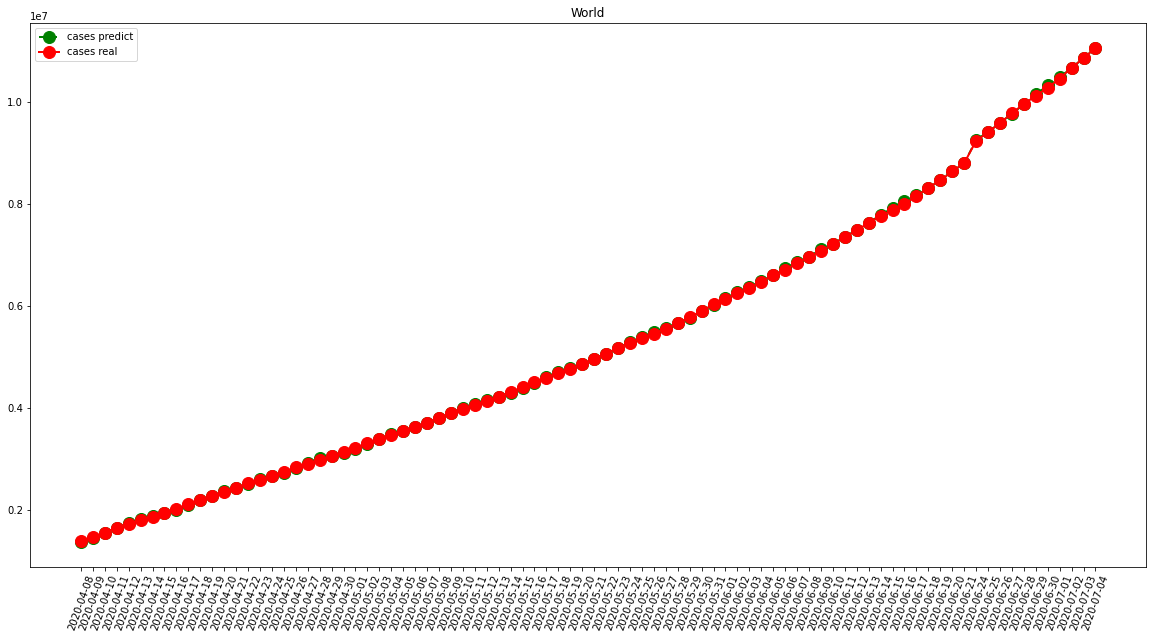

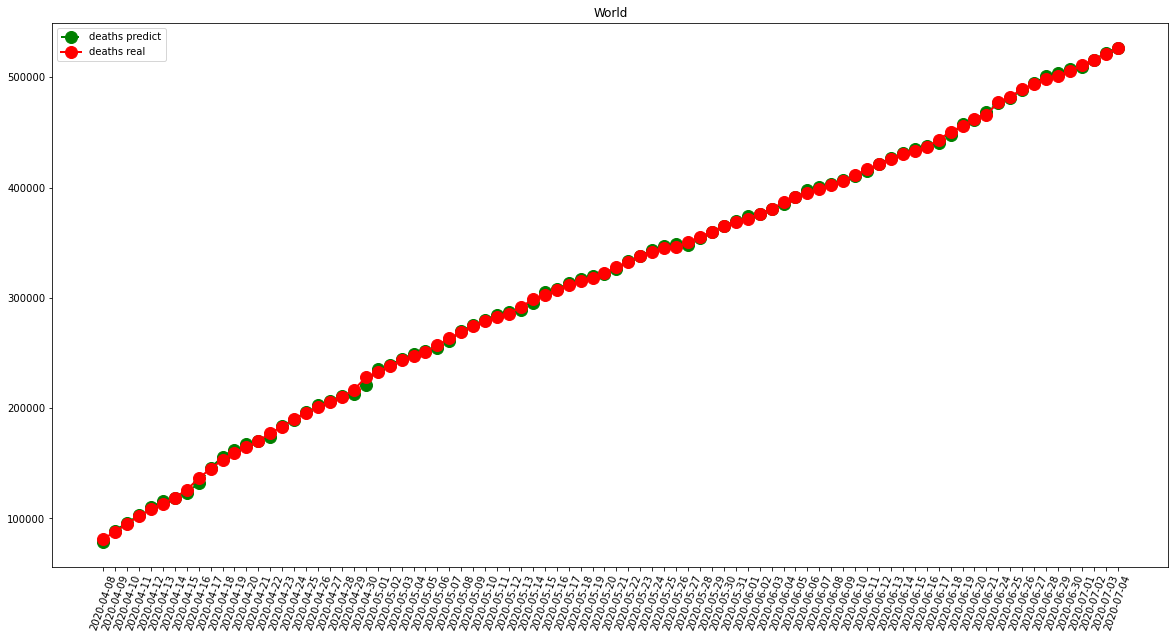

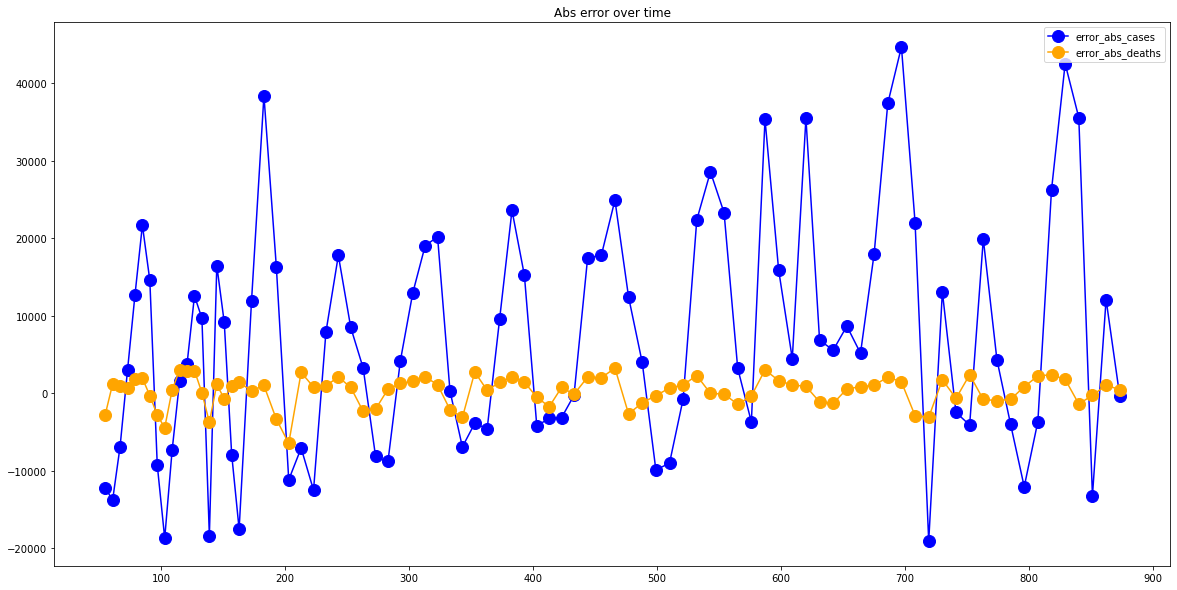

In [7]:
visShow("World")

-- France performances for cases --
MAE =  884.625
RMSE =  1470.0625695300637
-- France performances for deaths --
MAE =  183.25
RMSE =  341.84121557627697


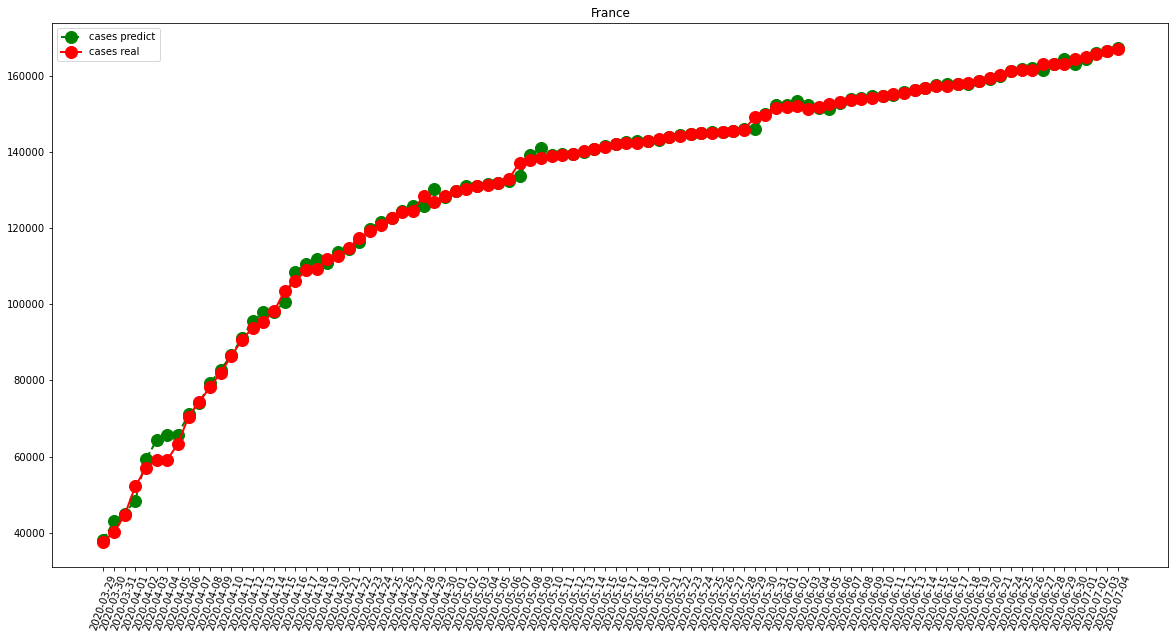

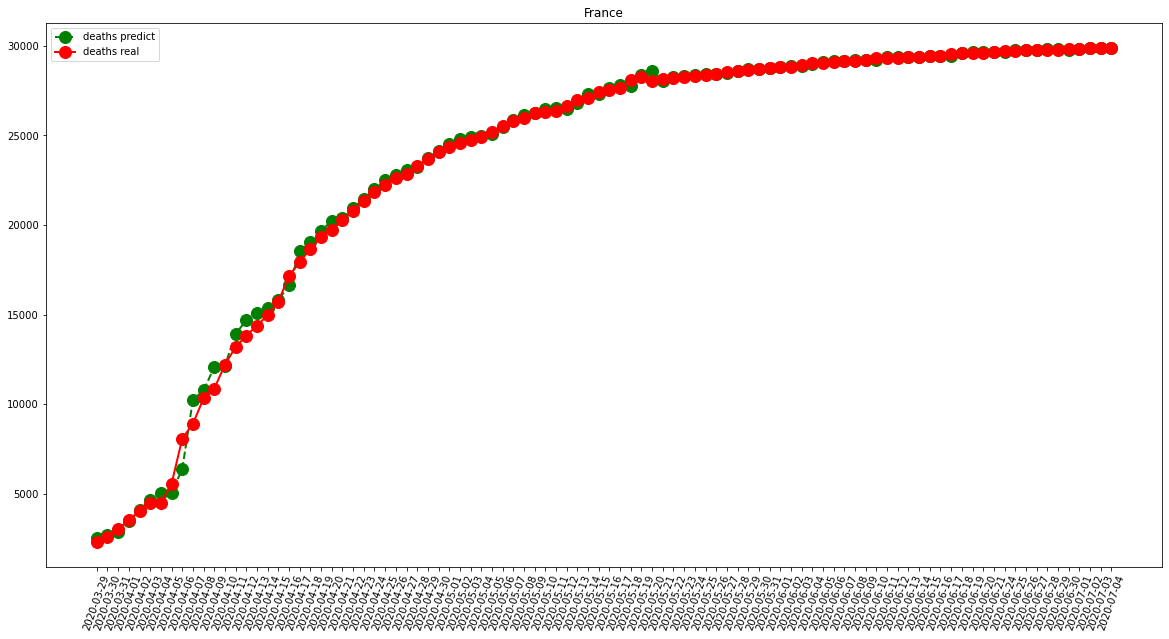

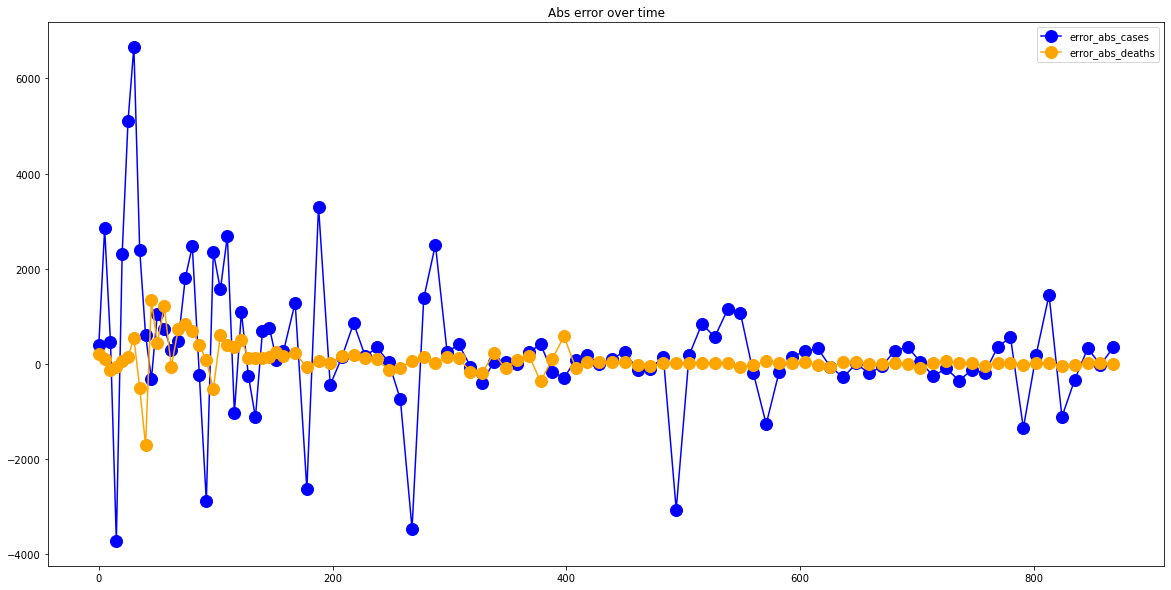

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  381.6041666666667
RMSE =  552.8156903525803
-- Italy performances for deaths --
MAE =  100.42708333333333
RMSE =  301.7684853492823


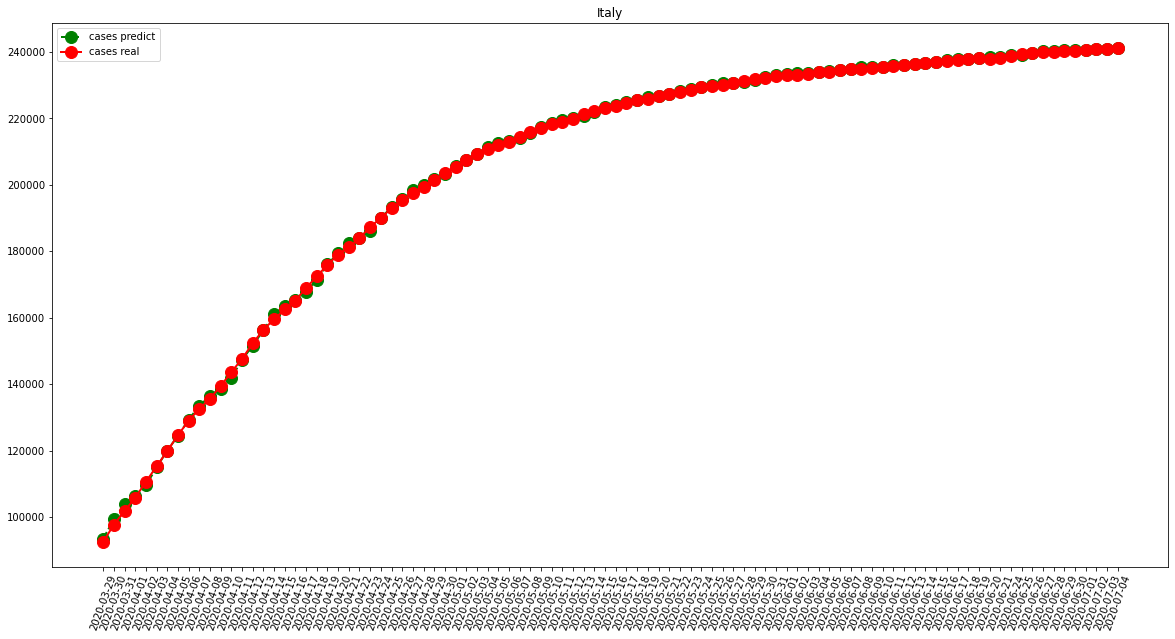

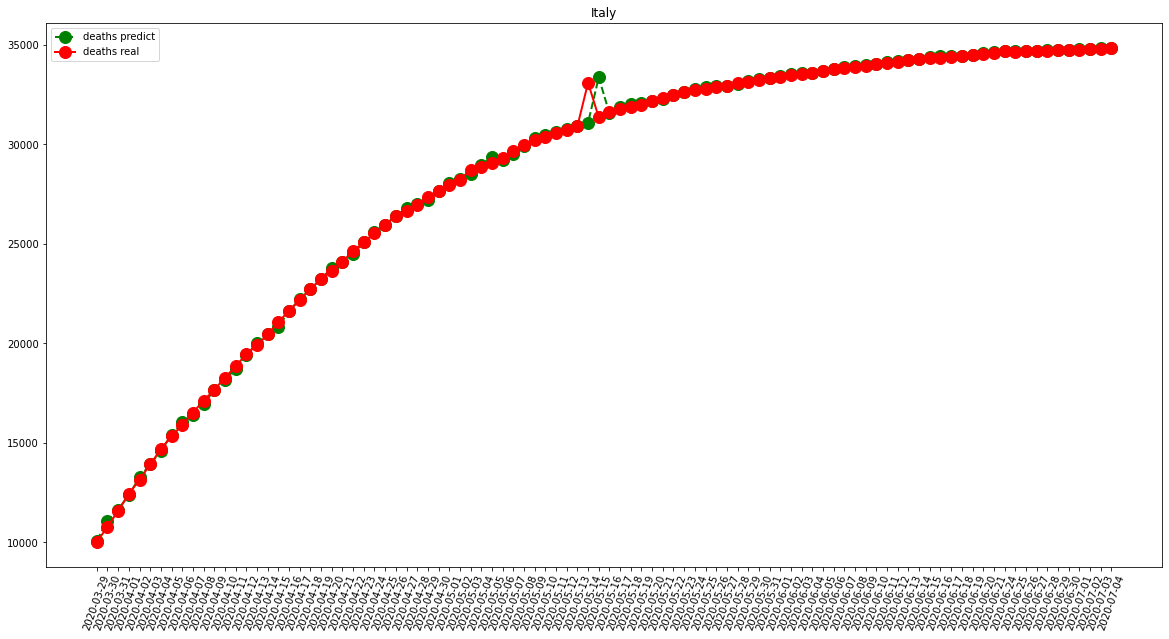

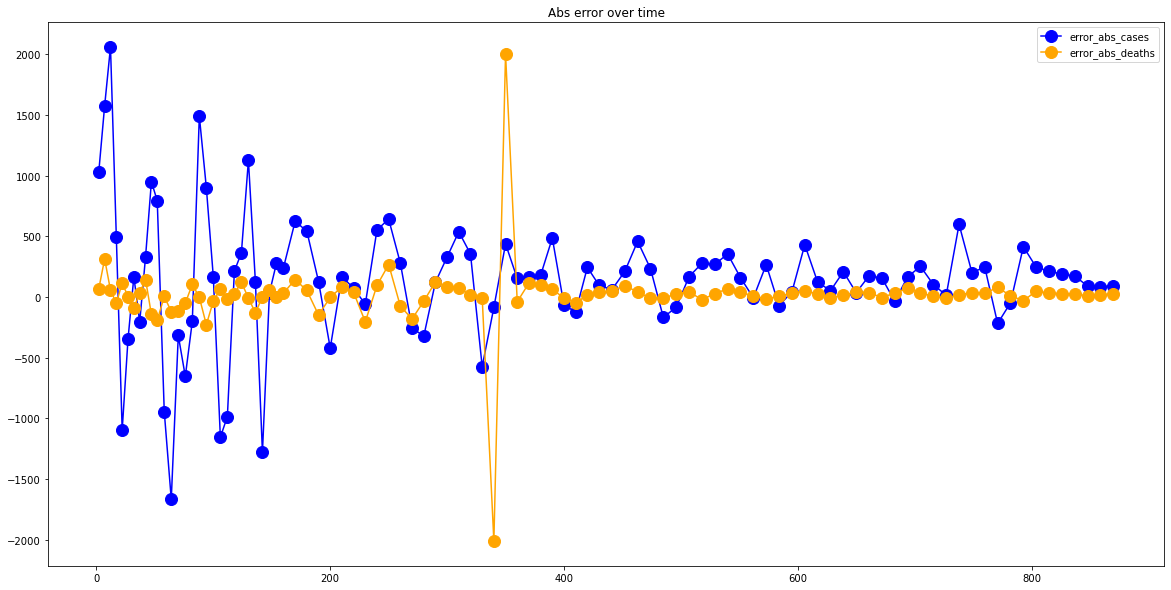

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  863.53125
RMSE =  2085.974470021945
-- Spain performances for deaths --
MAE =  188.25
RMSE =  414.2357923534212


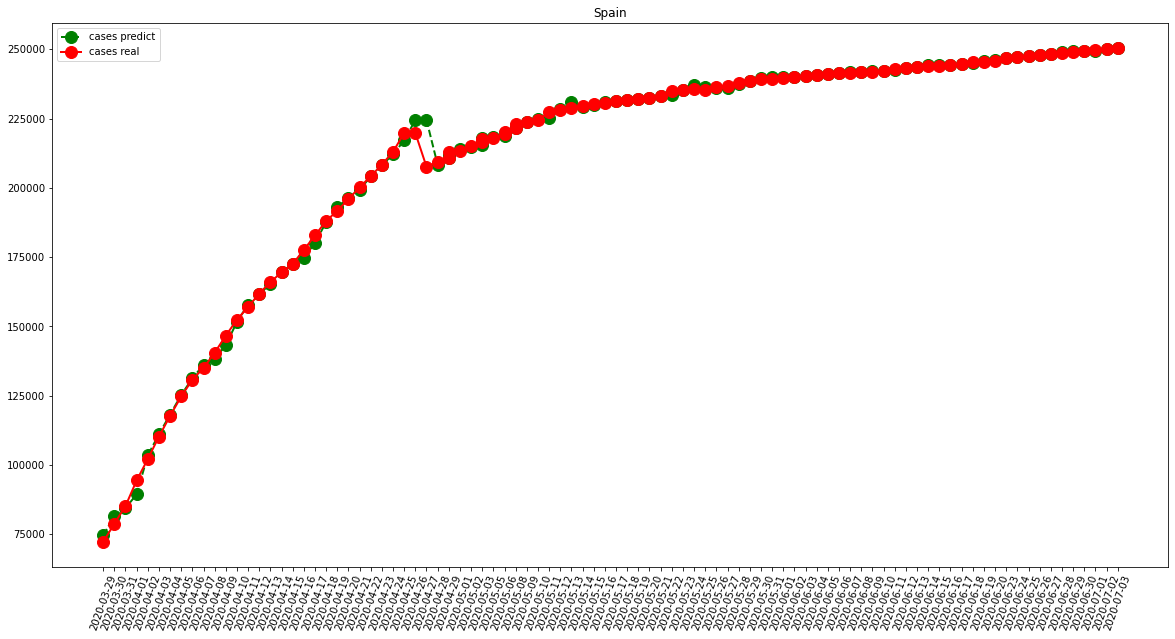

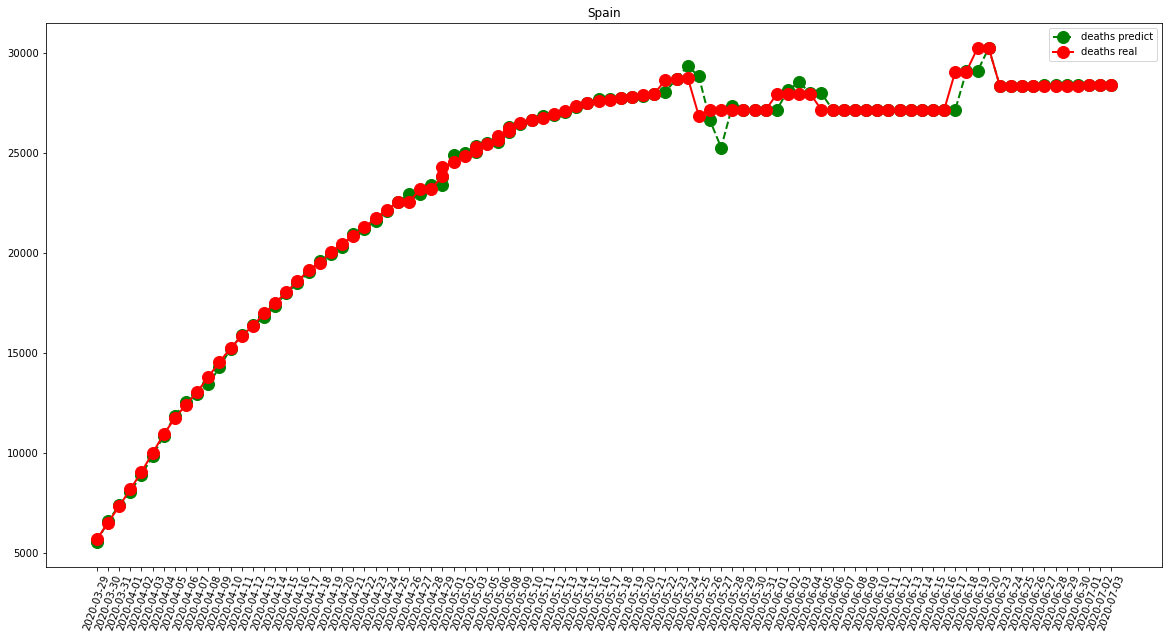

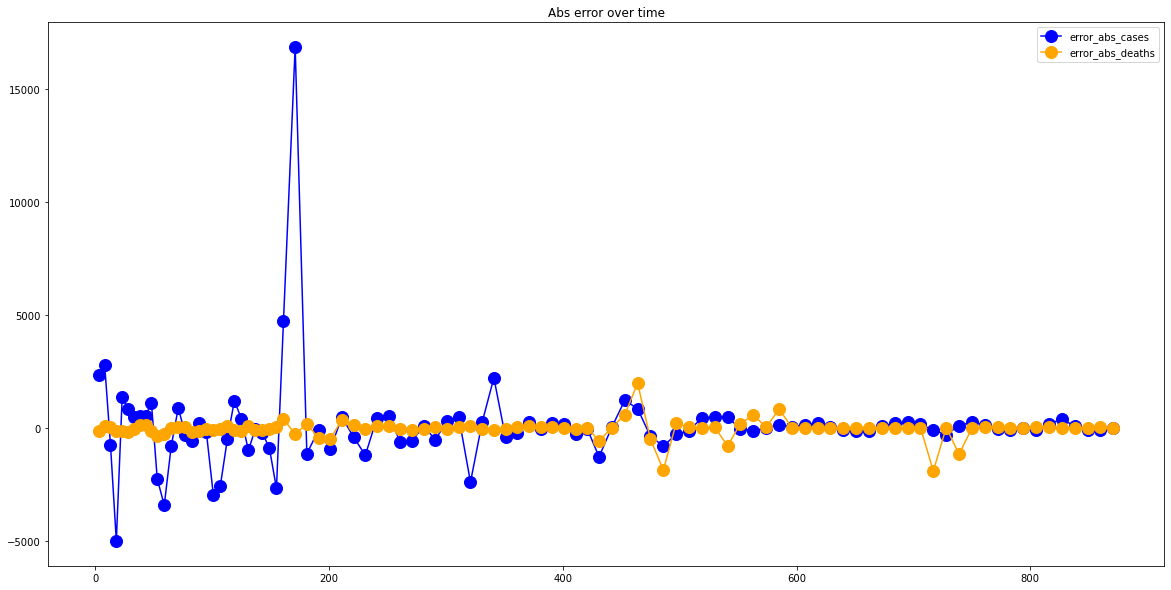

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  4890.6875
RMSE =  6678.355827784261
-- United States performances for deaths --
MAE =  539.9166666666666
RMSE =  790.8157049317284


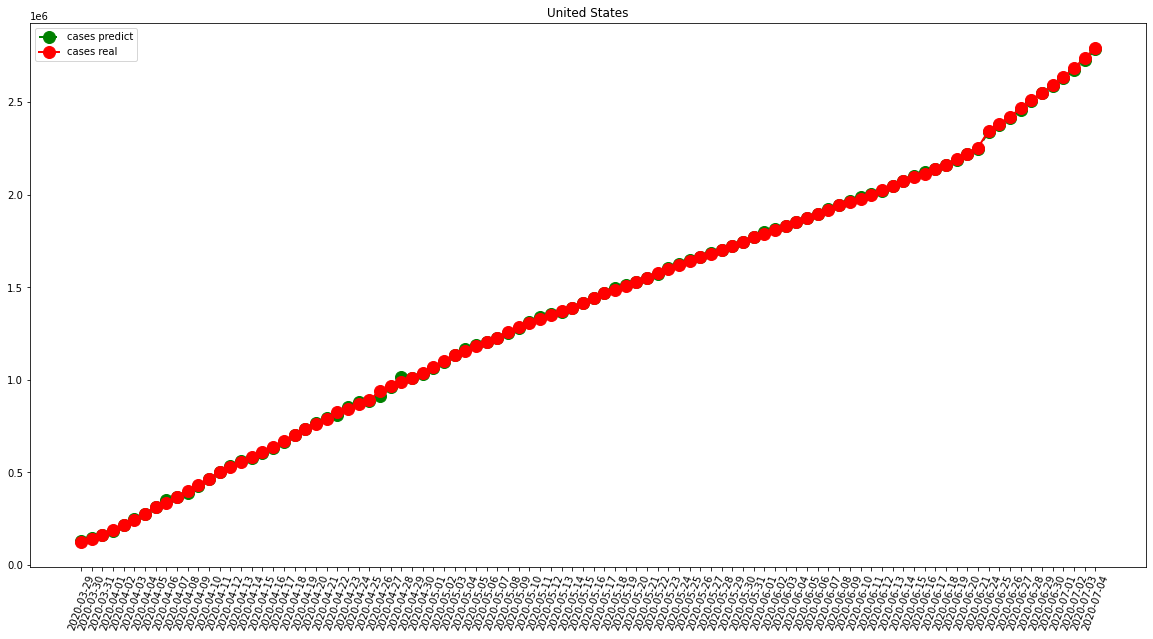

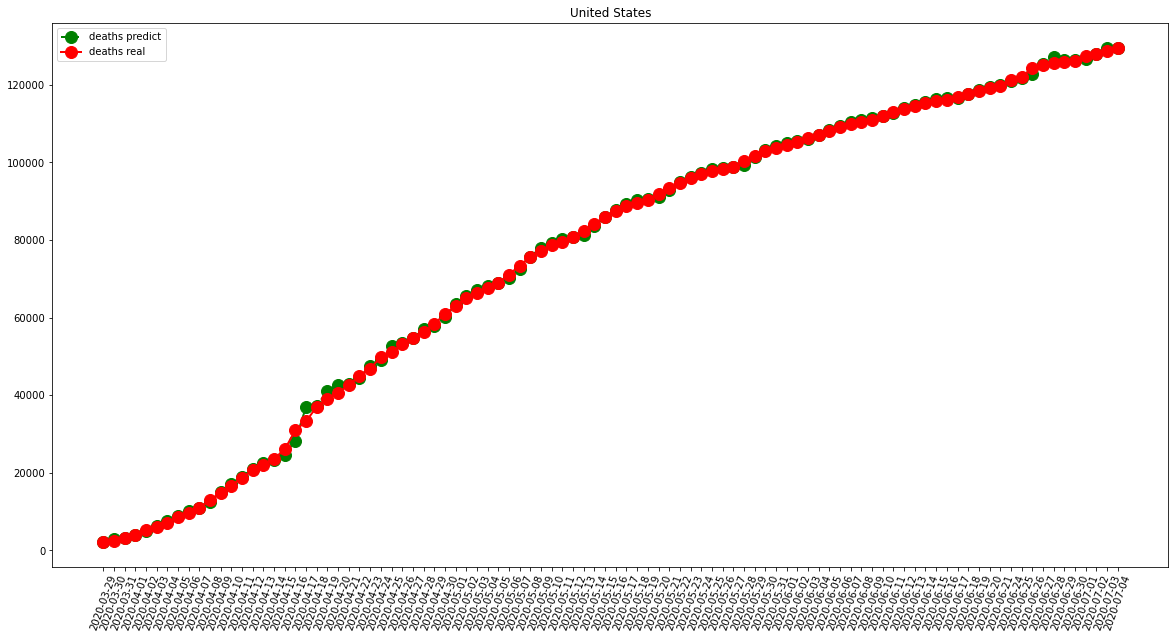

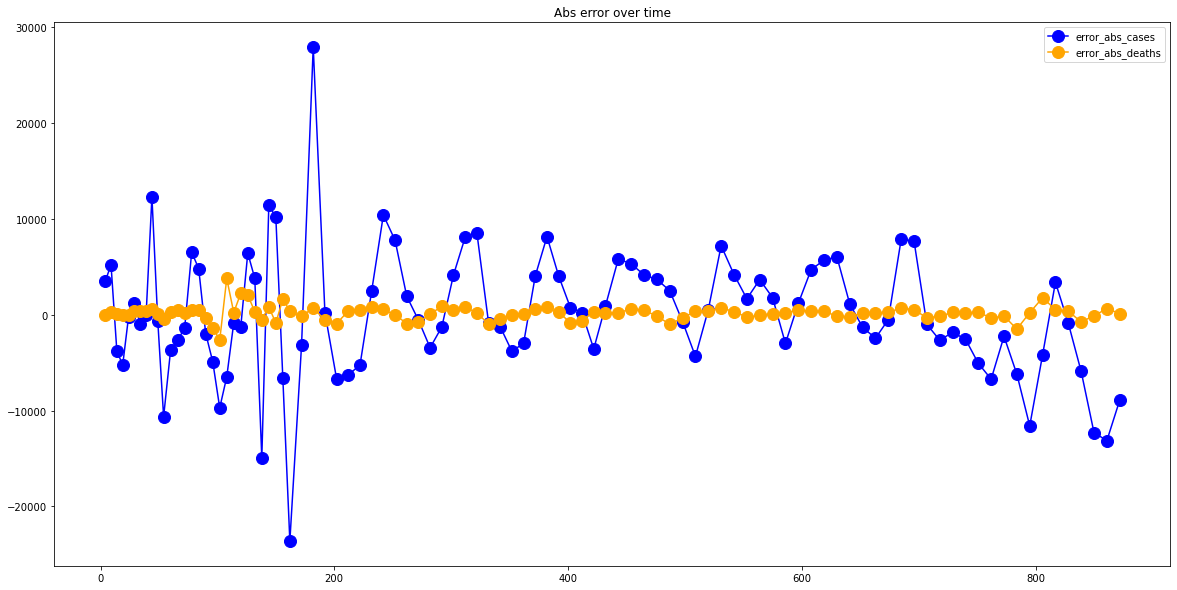

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  91.58333333333333
RMSE =  120.11851786187397
-- China performances for deaths --
MAE =  39.625
RMSE =  160.1752945993857


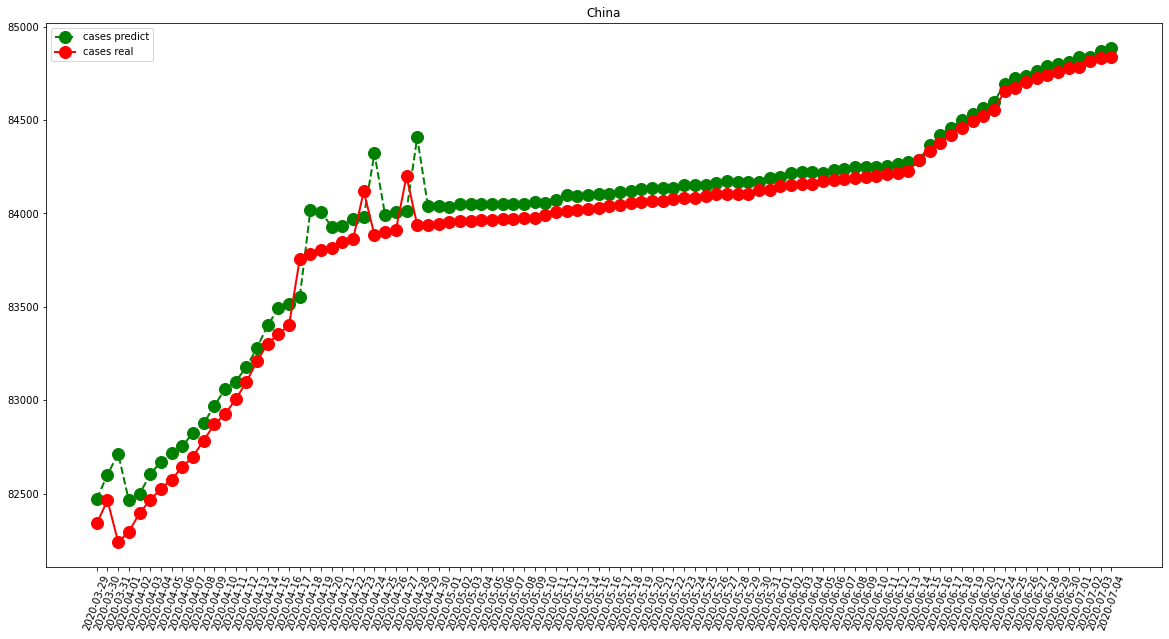

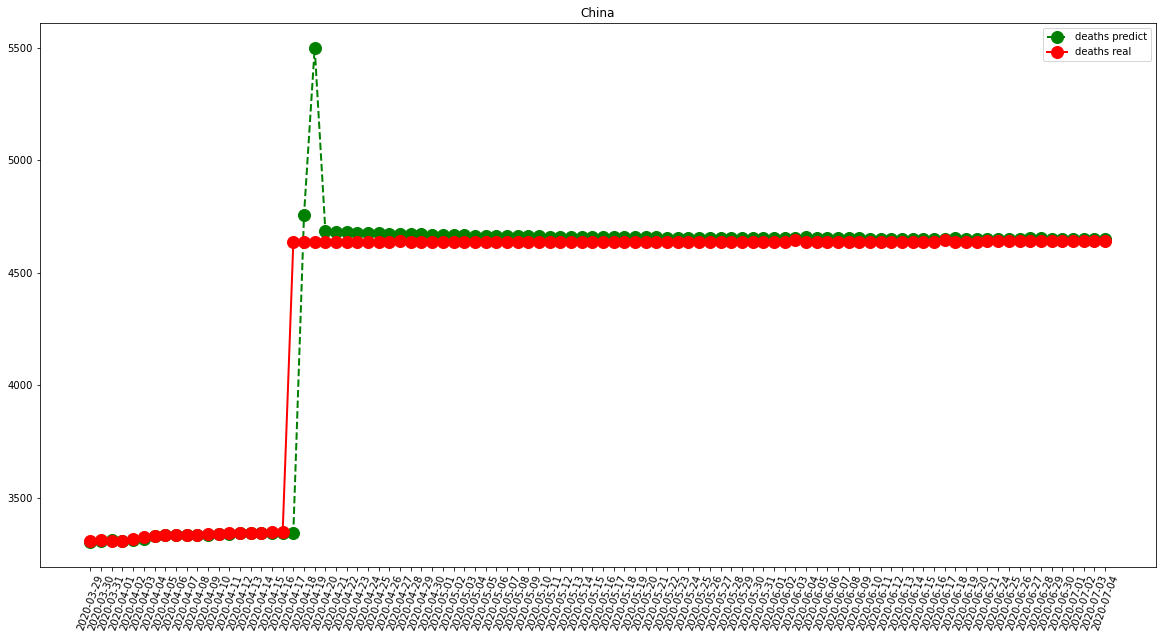

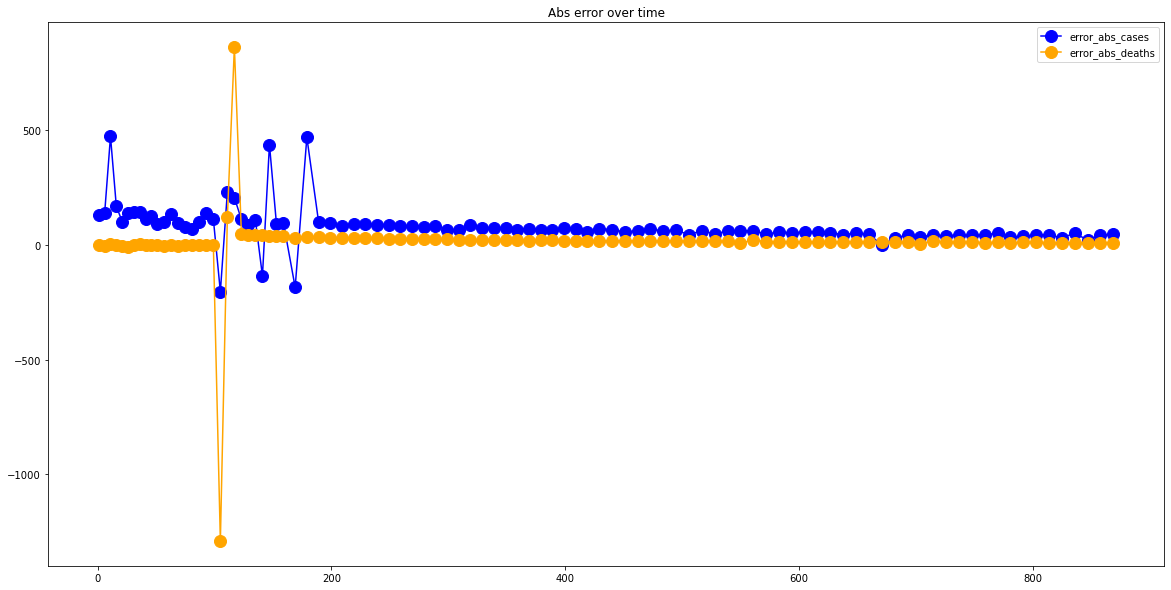

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1279.5441176470588
RMSE =  3912.3190448662963
-- United Kingdom performances for deaths --
MAE =  252.02941176470588
RMSE =  592.520860888657


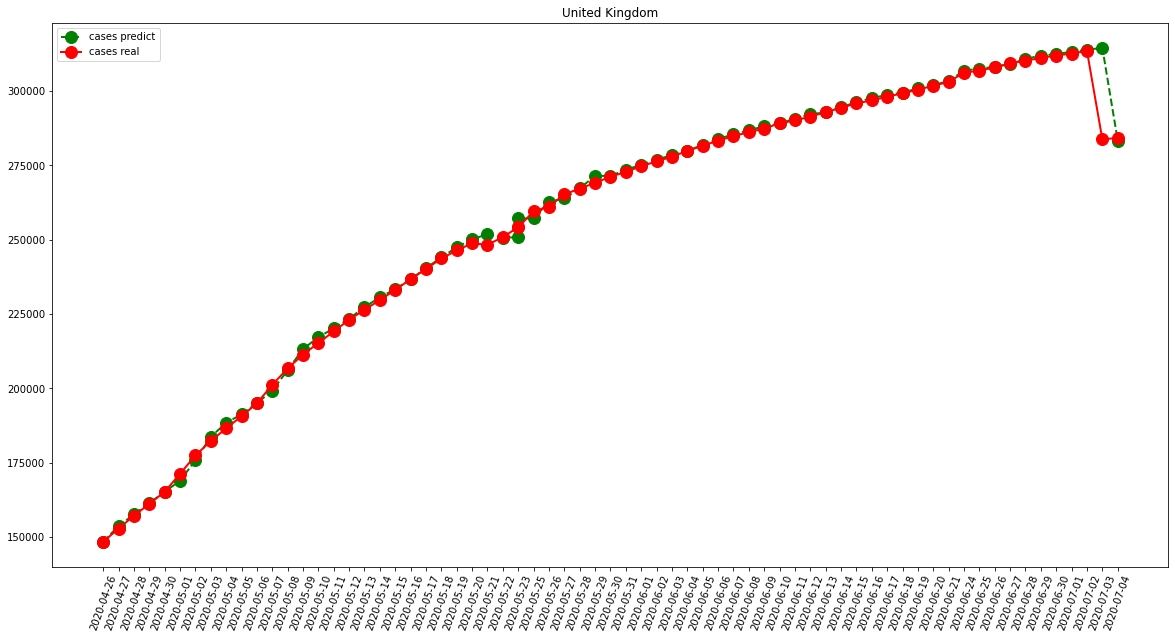

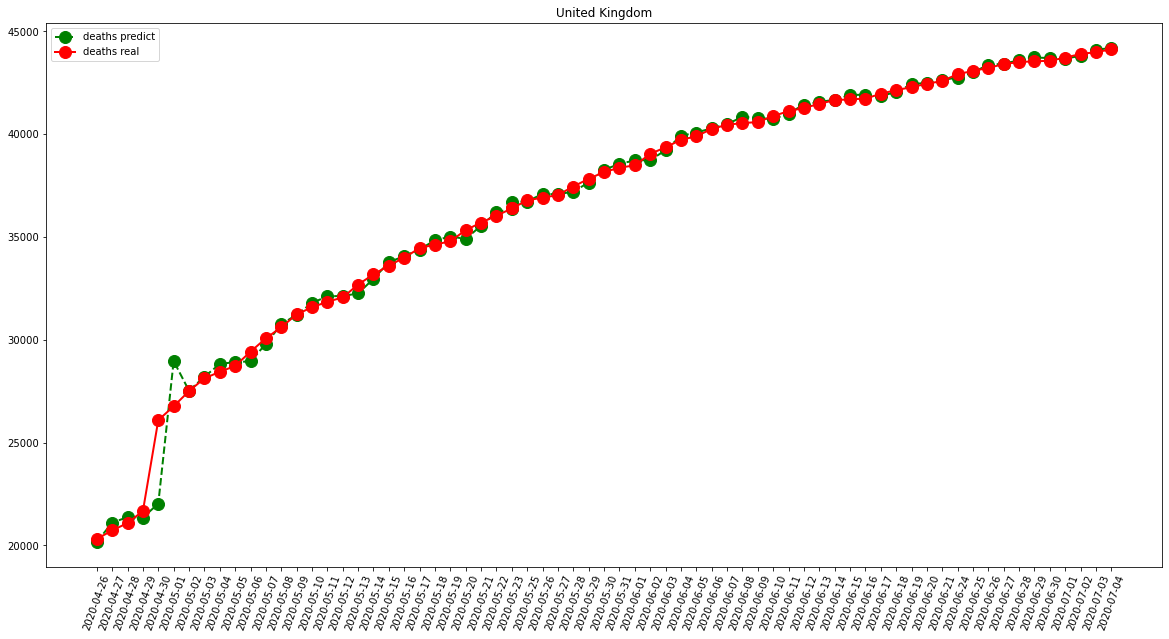

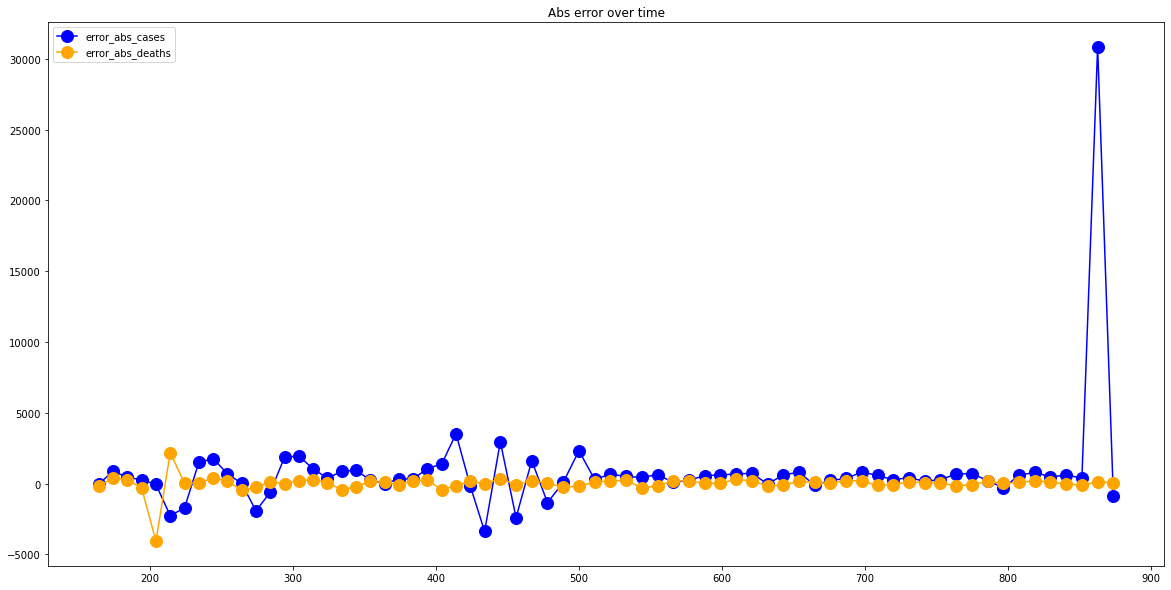

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  315.5882352941176
RMSE =  446.3992541634081
-- Germany performances for deaths --
MAE =  32.25
RMSE =  52.660259600352056


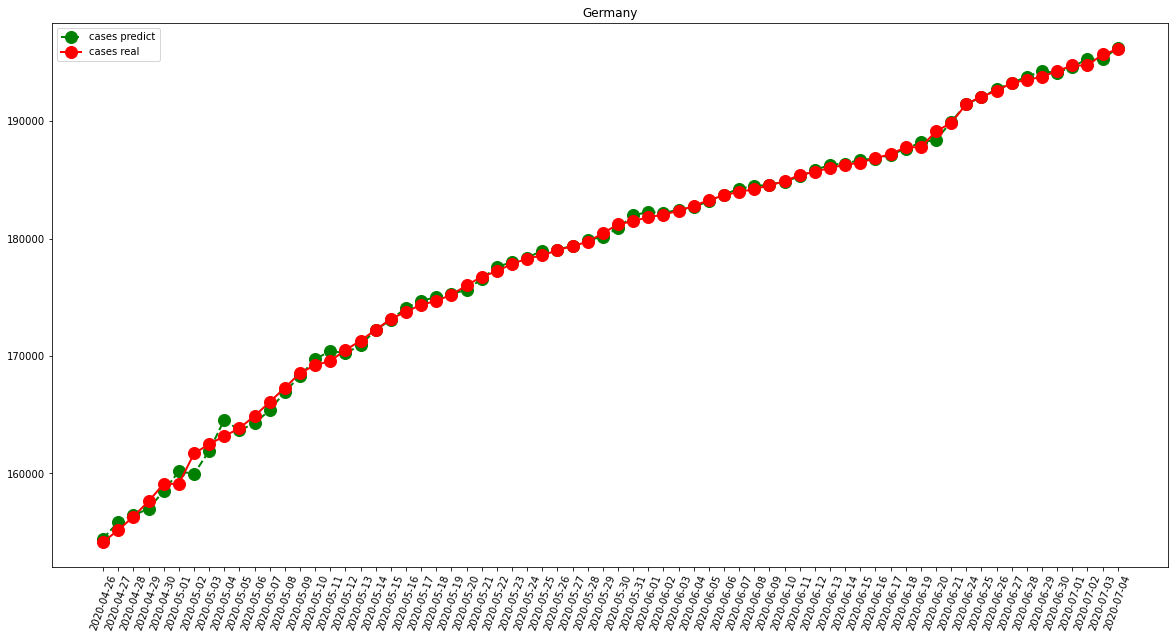

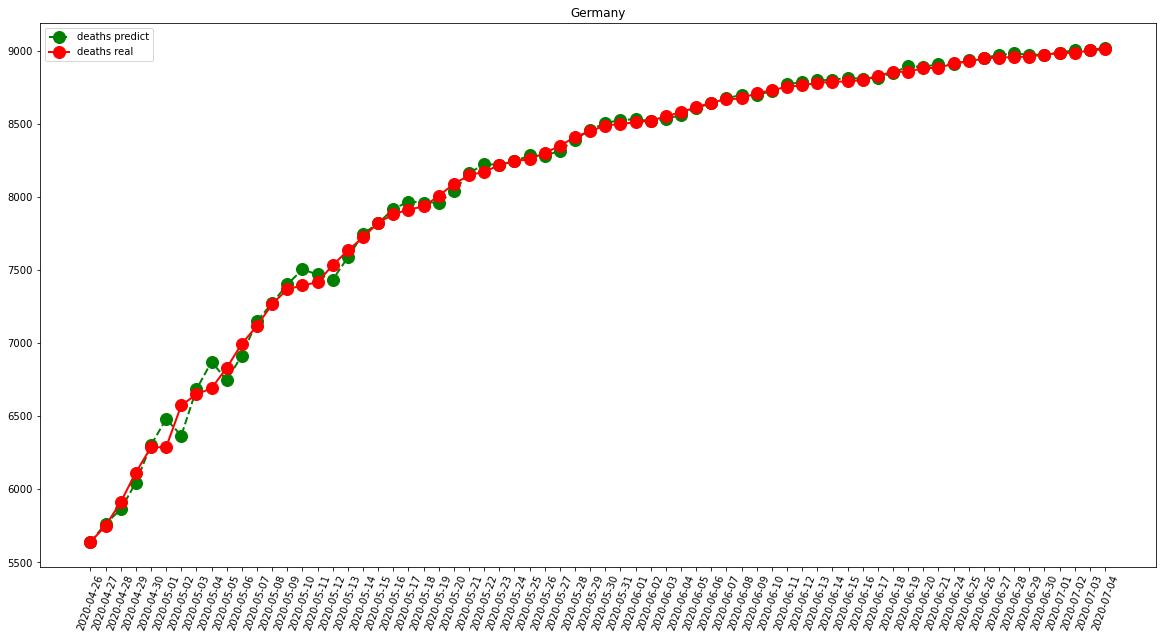

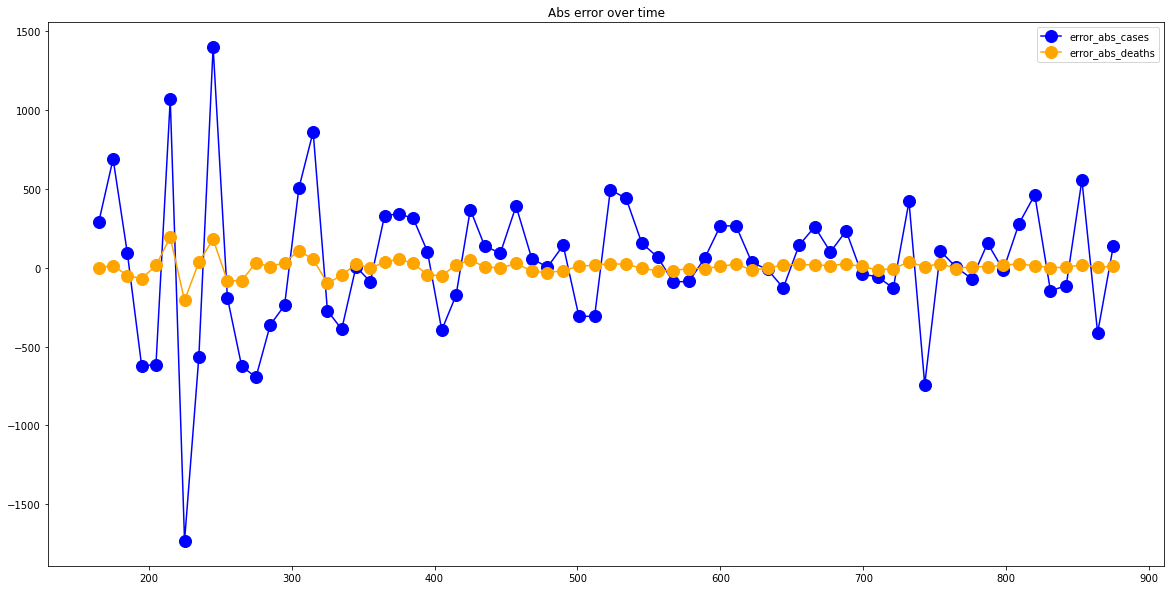

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  279.22058823529414
RMSE =  355.48159131621134
-- Iran performances for deaths --
MAE =  17.852941176470587
RMSE =  29.488781515927673


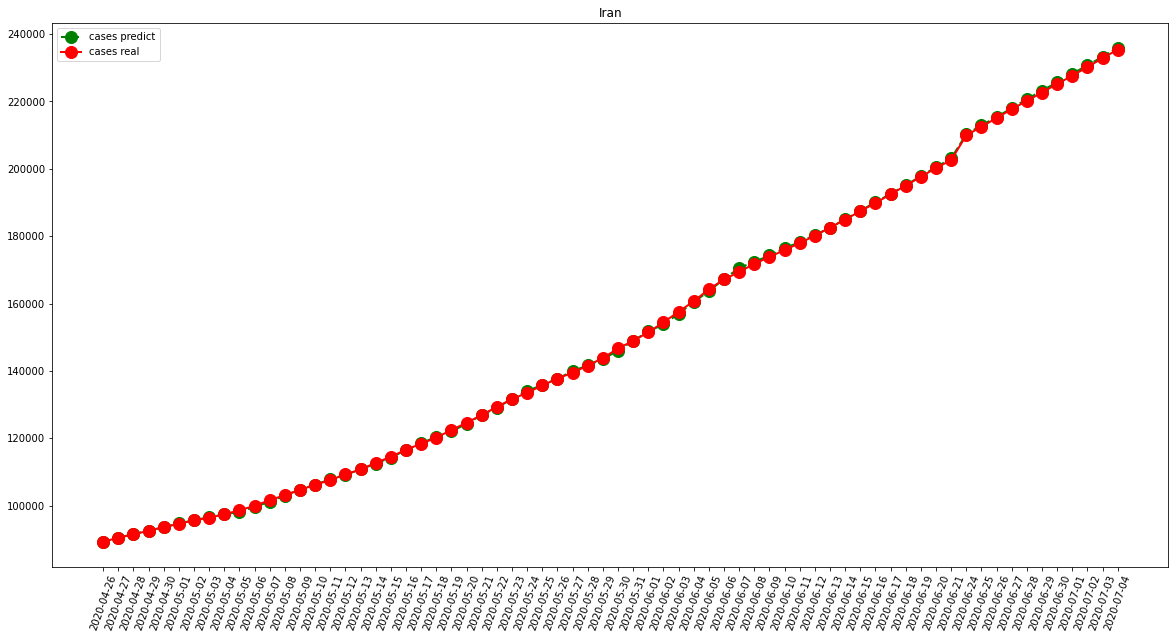

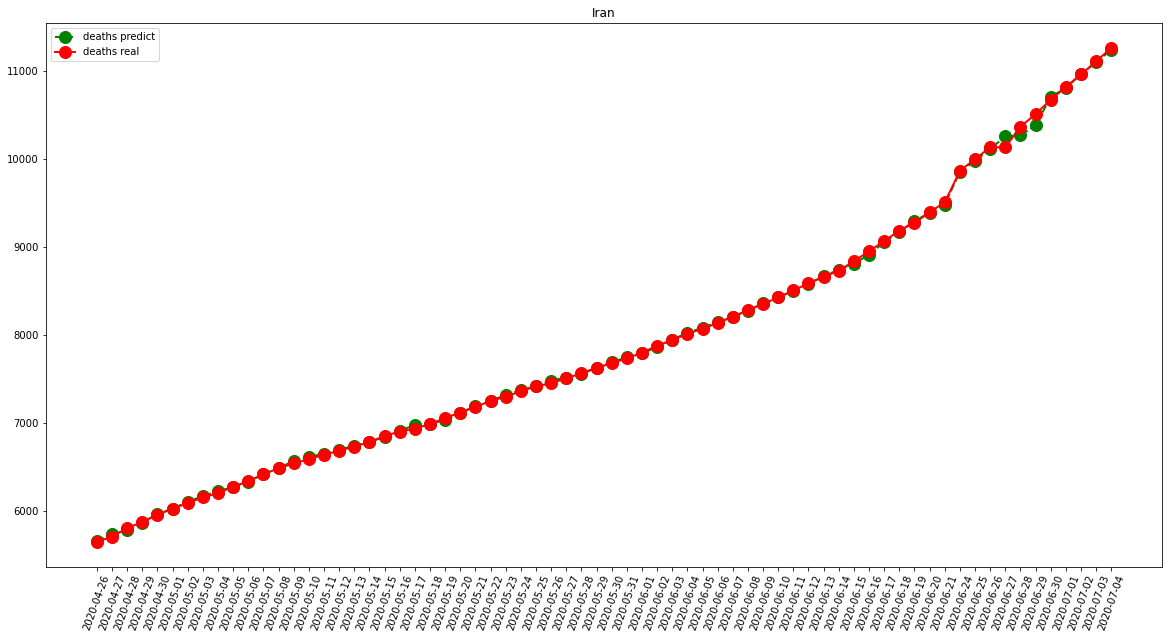

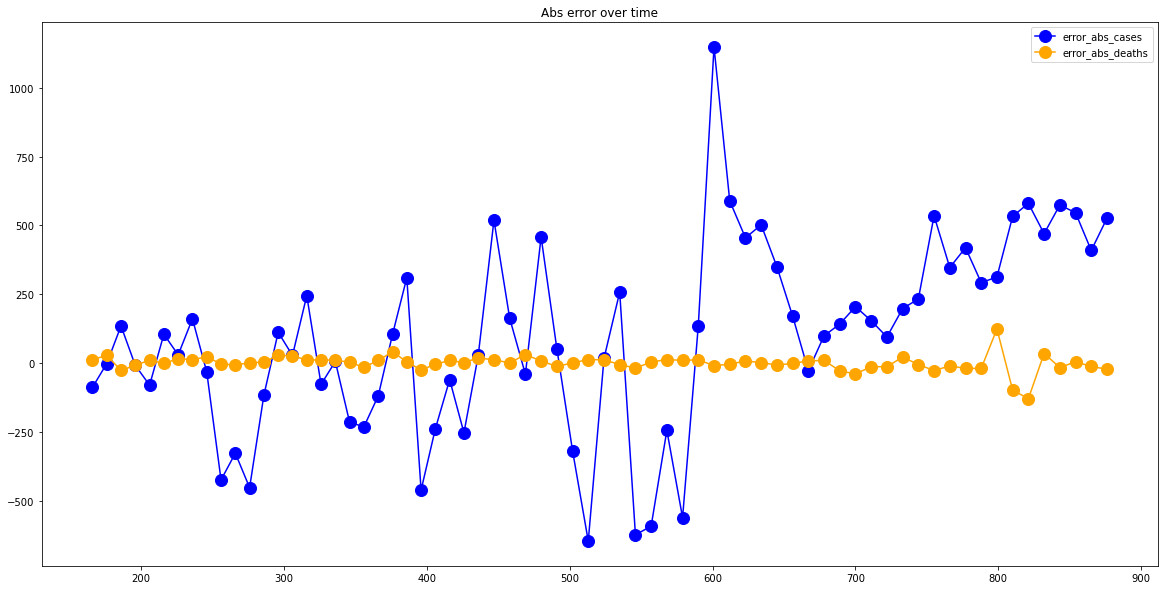

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  272.5735294117647
RMSE =  416.3104928663079
-- Turkey performances for deaths --
MAE =  26.91176470588235
RMSE =  123.0874868204104


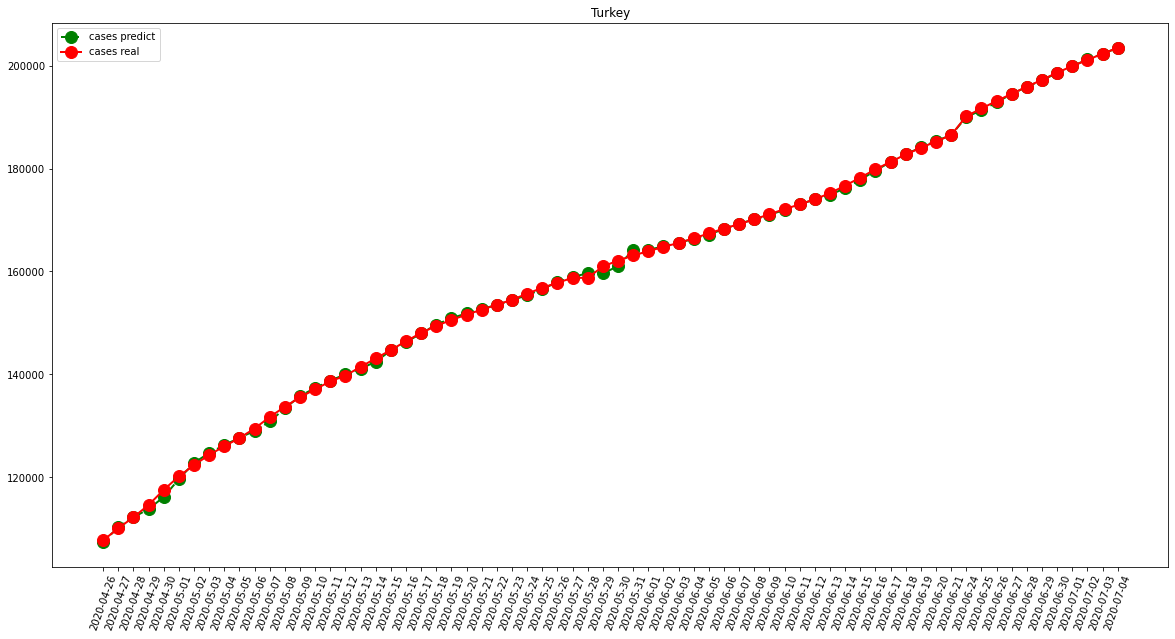

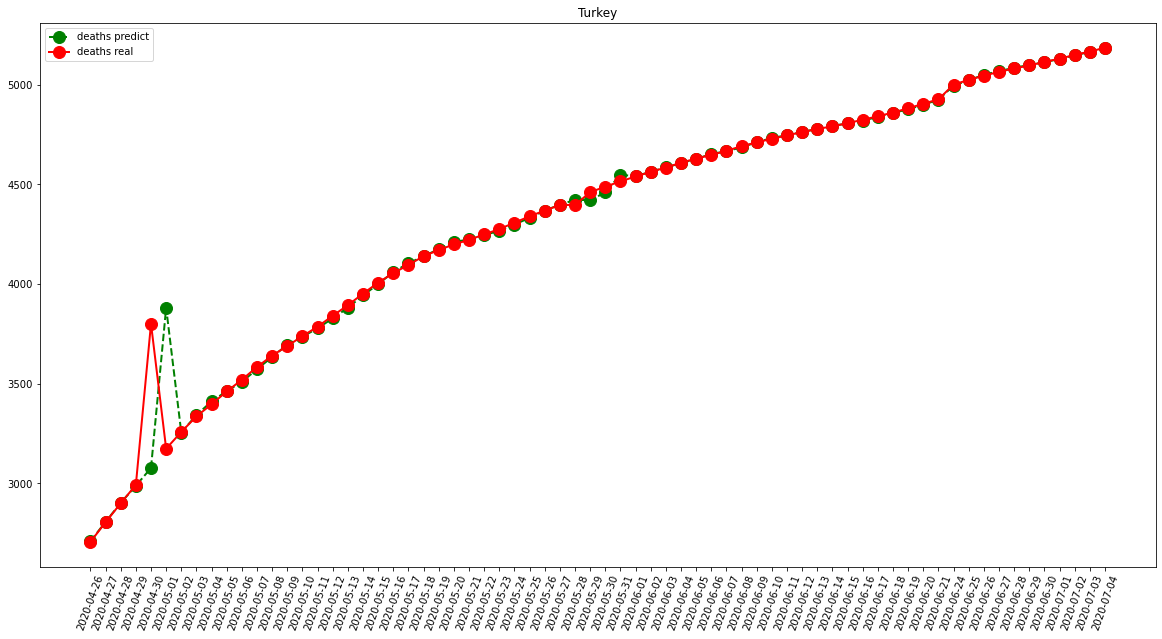

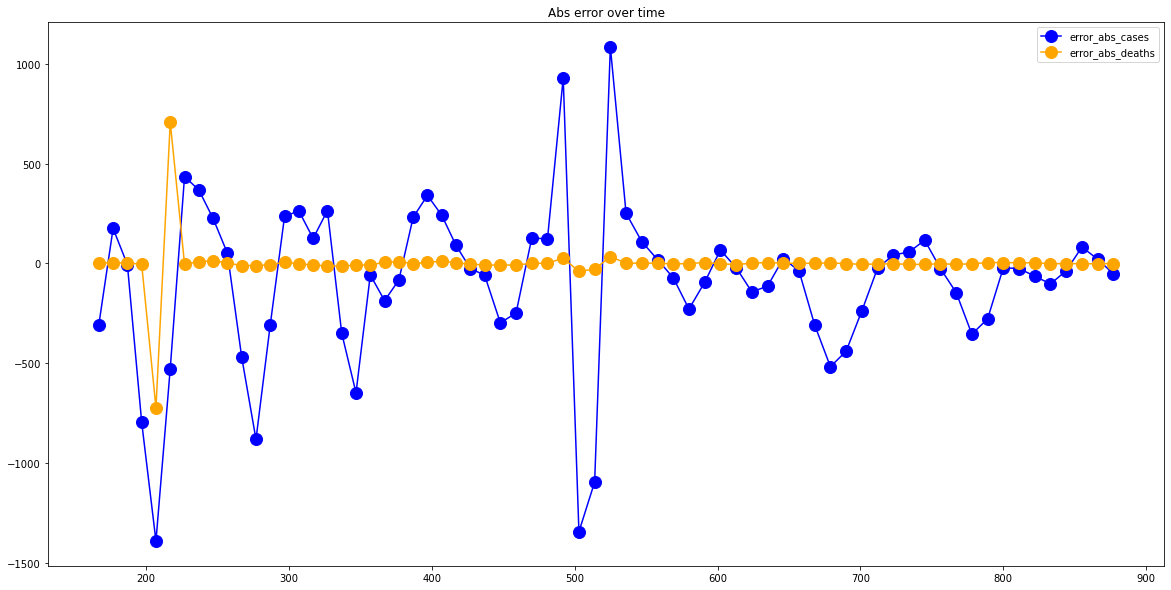

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  8542.707317073171
RMSE =  10950.425848718975
-- Brazil performances for deaths --
MAE =  366.1463414634146
RMSE =  458.433227842664


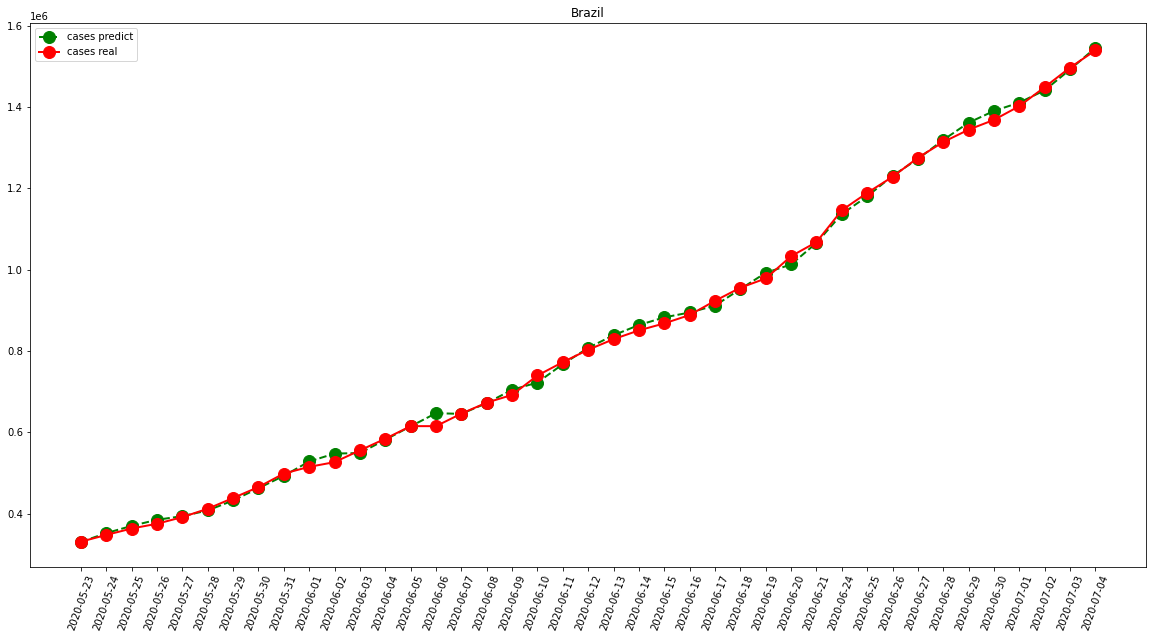

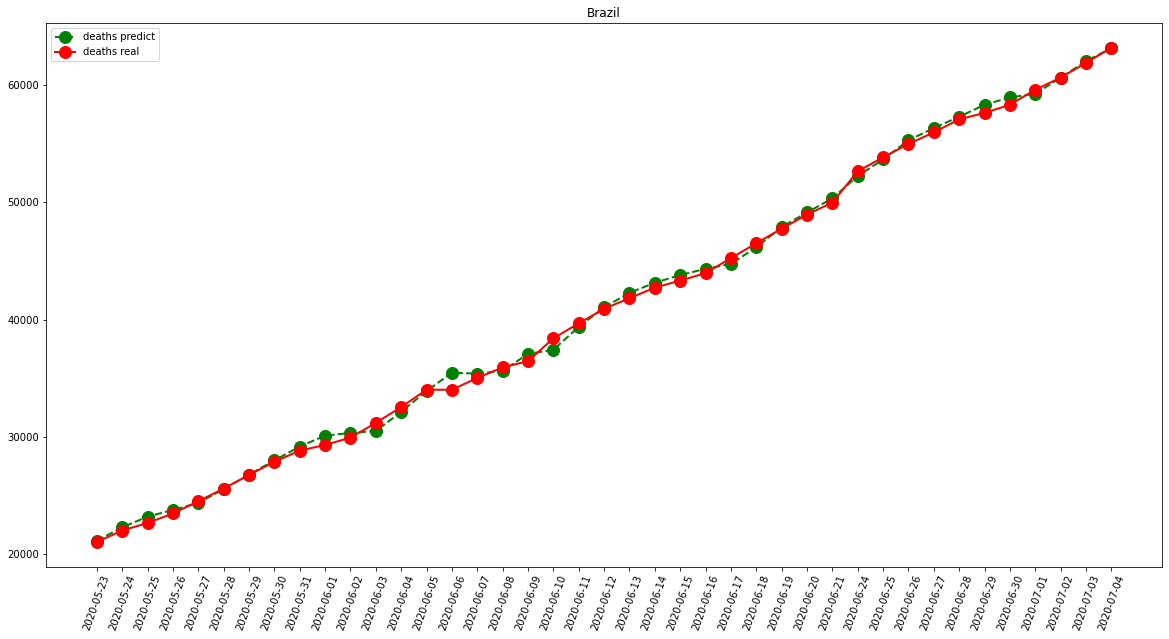

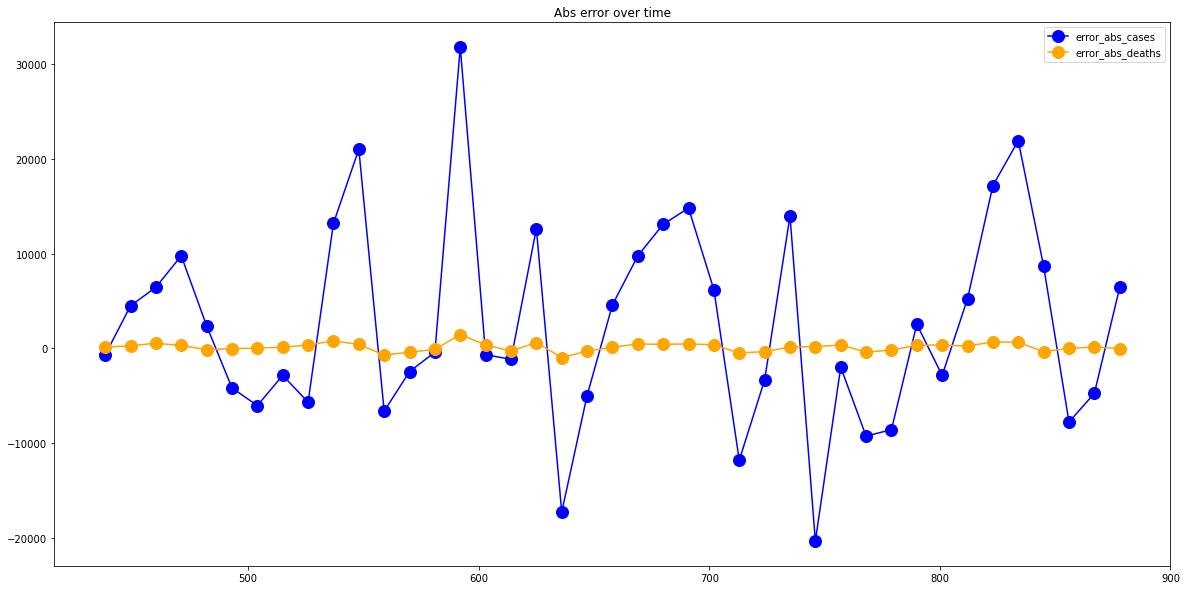

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)